In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

In [ ]:
wine_s = pd.read_csv('wine.csv')
wine_s

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
wine1 = wine_s.iloc[:, 1:]

In [ ]:
wine1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
wine1.head(7)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290


In [ ]:
wine1.isna().sum() 

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler #can normalize data by readymade funtion here 
trans = MinMaxScaler()
winedata = pd.DataFrame(trans.fit_transform(wine1.iloc[:,0:]))
winedata

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


# **Hierarchical Clustering**

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

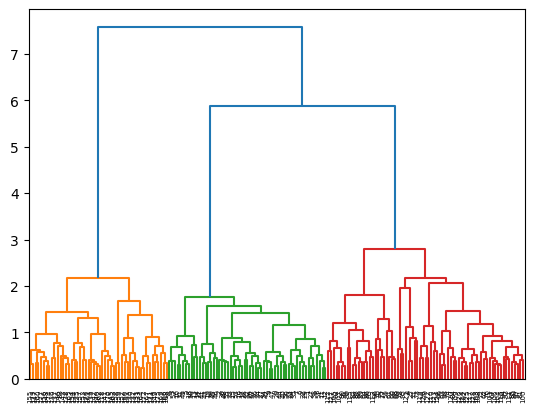

In [ ]:
winedend = sch.dendrogram(sch.linkage(winedata, method='ward'))

In [ ]:
wine_comp = AgglomerativeClustering(n_clusters=3, linkage='average',affinity = "euclidean").fit(wine1)
cluster_labels=pd.Series(wine_comp.labels_)
cluster_labels
wine_s['clust']=cluster_labels # creating a  new column and assigning it to new column 
wine_s

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [ ]:
wine_s['clust'].value_counts()

0    130
1     42
2      6
Name: clust, dtype: int64

In [ ]:
wine_s.groupby(wine_s.clust).mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,2.269231,12.714077,2.506385,2.346231,20.392308,97.176923,2.086692,1.671308,0.389846,1.462385,4.844000,0.912200,2.429923,583.369231
1,1.047619,13.725238,1.882143,2.422857,17.178571,106.547619,2.803095,2.928095,0.288095,1.899286,5.410000,1.075238,3.114762,1141.119048
2,1.000000,14.136667,1.831667,2.411667,16.266667,107.666667,3.255000,3.493333,0.271667,2.216667,7.233333,1.113333,3.028333,1530.333333


# **Principal component analysis**

In [ ]:
# Considering only numerical data 
wine1.data = wine1.iloc[:,1:]
wine1.data.head()

,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Converting into numpy array
WINE = wine1.data.values
WINE

array([[1.710e+00, 2.430e+00, 1.560e+01, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.780e+00, 2.140e+00, 1.120e+01, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [2.360e+00, 2.670e+00, 1.860e+01, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [4.280e+00, 2.260e+00, 2.000e+01, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [2.590e+00, 2.370e+00, 2.000e+01, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [4.100e+00, 2.740e+00, 2.450e+01, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
# Normalizing the numerical data 
wine1_normal = scale(WINE)

In [ ]:
wine1_normal

array([[-0.5622498 ,  0.23205254, -1.16959318, ...,  0.36217728,
         1.84791957,  1.01300893],
       [-0.49941338, -0.82799632, -2.49084714, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.02123125,  1.10933436, -0.2687382 , ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.74474449, -0.38935541,  0.15166079, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.22769377,  0.01273209,  0.15166079, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.58316512,  1.36520822,  1.50294326, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
pca = PCA(n_components = 3)
pca_values = pca.fit_transform(wine1_normal)
pca_values 

array([[-3.07857252e+00, -1.21926180e+00, -3.88069767e-01],
       [-2.19079587e+00,  6.64568240e-01, -1.92210947e+00],
       [-2.45644079e+00, -1.50581110e+00,  5.56489034e-01],
       [-3.42275012e+00, -2.55605831e+00, -7.03345739e-01],
       [-9.48975875e-01, -1.32973488e+00,  1.76063170e+00],
       [-2.76731538e+00, -1.77985016e+00, -9.44531169e-01],
       [-2.18375478e+00, -4.58036710e-01, -8.05131410e-01],
       [-1.82632140e+00, -1.33985744e+00, -2.81585363e-03],
       [-2.19383381e+00,  2.03202783e-01, -1.37391008e+00],
       [-2.59000186e+00, -4.35609334e-01, -1.00682982e+00],
       [-3.26089058e+00, -1.03803643e+00, -5.51904036e-01],
       [-1.55488981e+00,  1.04878503e-01, -9.22660838e-01],
       [-1.96567565e+00, -2.73148206e-01, -7.68037835e-01],
       [-3.14743458e+00, -2.58202082e-01, -9.02256787e-01],
       [-4.00629989e+00, -1.65773346e+00, -1.56480932e+00],
       [-2.13051424e+00, -1.67993499e+00, -1.16141082e-01],
       [-1.87351026e+00, -2.15937482e+00

In [ ]:
#loadings or weights
pca.components_

array([[ 0.25929907,  0.01550401,  0.23457717, -0.12997254, -0.39396388,
        -0.4262194 ,  0.30156031, -0.31599638,  0.12050505, -0.31314859,
        -0.38744   , -0.26504376],
       [-0.22363659, -0.45446769, -0.08389744, -0.41000066, -0.14109614,
        -0.07041646, -0.01025314, -0.13306564, -0.53637656,  0.27207746,
         0.11846639, -0.38712793],
       [ 0.04407439,  0.54359695,  0.6257736 , -0.04358717,  0.1067167 ,
         0.13134819,  0.21696829,  0.07955089, -0.30000831,  0.18463194,
         0.2156754 , -0.23751456]])

In [ ]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.38612318, 0.16881157, 0.11376556])

In [ ]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([38.61, 55.49, 66.87])

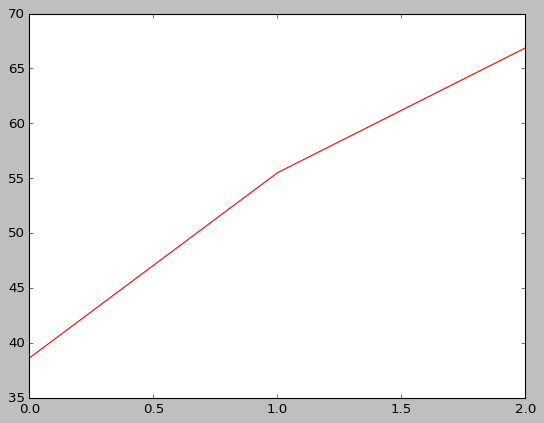

In [ ]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [ ]:
pca_values[:,0:1]

array([[-3.07857252],
       [-2.19079587],
       [-2.45644079],
       [-3.42275012],
       [-0.94897588],
       [-2.76731538],
       [-2.18375478],
       [-1.8263214 ],
       [-2.19383381],
       [-2.59000186],
       [-3.26089058],
       [-1.55488981],
       [-1.96567565],
       [-3.14743458],
       [-4.00629989],
       [-2.13051424],
       [-1.87351026],
       [-1.70365337],
       [-3.238178  ],
       [-1.94408078],
       [-2.94642239],
       [-1.09489837],
       [-2.4456023 ],
       [-1.70081887],
       [-1.72046805],
       [-0.96736682],
       [-1.68327066],
       [-1.18897314],
       [-2.0440134 ],
       [-2.09994017],
       [-2.34841466],
       [-2.52075473],
       [-1.5334142 ],
       [-1.7198793 ],
       [-1.3083414 ],
       [-1.83755336],
       [-1.3168969 ],
       [-1.11112978],
       [-1.52935162],
       [-2.26855413],
       [-2.48051126],
       [-0.59309439],
       [-2.8906988 ],
       [-0.41033555],
       [-2.10640792],
       [-0

In [ ]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine_s[['Type']]], axis = 1)
finalDf

,pc1,pc2,Type
0,-3.078573,-1.219262,1
1,-2.190796,0.664568,1
2,-2.456441,-1.505811,1
3,-3.422750,-2.556058,1
4,-0.948976,-1.329735,1
...,...,...,...
173,3.620616,-1.471886,3
174,2.768177,-1.426121,3
175,2.888258,-2.420770,3
176,2.551908,-2.086372,3


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')

<Axes: xlabel='pc1', ylabel='pc2'>

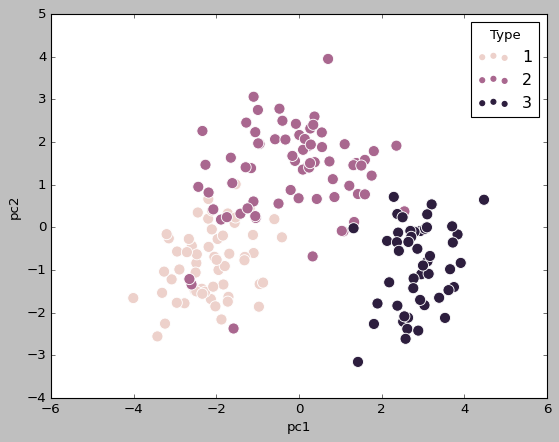

In [ ]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type',s = 100)  

# **K-mean Cluster**

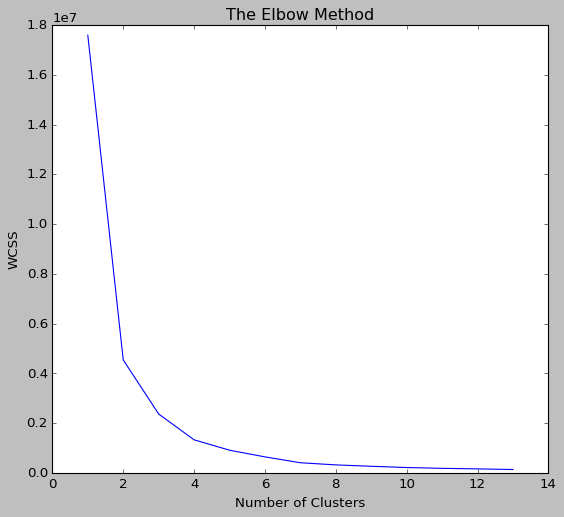

In [ ]:
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(8, 7))
WCSS = []     #Within cluster sum of square(empty list created)
for i in range(1, 14):
    clf = KMeans(n_clusters=i)
    clf.fit(wine_s)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 14), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

Cluster using K=3

In [ ]:
clf = KMeans(n_clusters=3) #K=3
y_kmeans = clf.fit_predict(wine_s) 

In [ ]:
y_kmeans

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1], dtype=int32)

In [ ]:
clf.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1], dtype=int32)

In [ ]:
clf.cluster_centers_

array([[ 2.25806452e+00,  1.29298387e+01,  2.50403226e+00,
         2.40806452e+00,  1.98903226e+01,  1.03596774e+02,
         2.11112903e+00,  1.58403226e+00,  3.88387097e-01,
         1.50338710e+00,  5.65032258e+00,  8.83967742e-01,
         2.36548387e+00,  7.28338710e+02,  1.61290323e-02],
       [ 2.27536232e+00,  1.25166667e+01,  2.49420290e+00,
         2.28855072e+00,  2.08231884e+01,  9.23478261e+01,
         2.07072464e+00,  1.75840580e+00,  3.90144928e-01,
         1.45188406e+00,  4.08695651e+00,  9.41159420e-01,
         2.49072464e+00,  4.58231884e+02, -2.22044605e-16],
       [ 1.02127660e+00,  1.38044681e+01,  1.88340426e+00,
         2.42617021e+00,  1.70234043e+01,  1.05510638e+02,
         2.86723404e+00,  3.01425532e+00,  2.85319149e-01,
         1.91042553e+00,  5.70255319e+00,  1.07829787e+00,
         3.11404255e+00,  1.19514894e+03,  1.12765957e+00]])

In [ ]:
clf.inertia_

2370748.522503578

In [ ]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
wine_s['clust']=md # creating a  new column and assigning it to new column 
wine_s

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [ ]:
wine_s.iloc[:,1:14].groupby(wine_s.clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,
0,12.929839,2.504032,2.408065,19.890323,103.596774,2.111129,1.584032,0.388387,1.503387,5.650323,0.883968,2.365484,728.338710
1,12.516667,2.494203,2.288551,20.823188,92.347826,2.070725,1.758406,0.390145,1.451884,4.086957,0.941159,2.490725,458.231884
2,13.804468,1.883404,2.426170,17.023404,105.510638,2.867234,3.014255,0.285319,1.910426,5.702553,1.078298,3.114043,1195.148936


In [ ]:
plt.style.use(['classic']) 
print(plt.style.available) 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

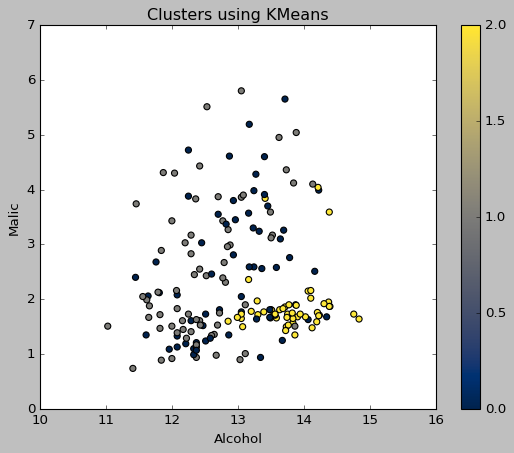

In [ ]:
wine_s.plot(x="Alcohol",y ="Malic",c=clf.labels_,kind="scatter",s=30 ,cmap='cividis') 
plt.title('Clusters using KMeans') 